In [332]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD

df = pd.read_csv('Spotify_data.csv') 

/var/folders/7f/xrny7_8d32q6xy6nps28xn8m0000gn/T/ipykernel_94902/2009463643.py:11: DtypeWarning: Columns (25,26,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Spotify_data.csv')


In [333]:
df.head()

,album_id,album_name,album_popularity,album_type,artists,artist_0,artist_1,artist_2,artist_3,artist_4,...,time_signature,track_href,type,uri,valence,explicit,track_popularity,release_year,release_month,rn
0,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/5JucnTkqh8uC...,audio_features,spotify:track:5JucnTkqh8uCZGggL1xxvv,0.382,True,0.0,2023.0,April,1
1,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,"['AB', '22nd Jim']",AB,22nd Jim,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/4VWrKNG3ssyZ...,audio_features,spotify:track:4VWrKNG3ssyZeboTgQ7Kj1,0.193,True,1.0,2023.0,April,1
2,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,"['AB', 'Veeze']",AB,Veeze,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/6JsVrTLJPSOS...,audio_features,spotify:track:6JsVrTLJPSOSpgJSnZyfSK,0.835,True,1.0,2023.0,April,1
3,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/7pZpw1xJWIav...,audio_features,spotify:track:7pZpw1xJWIavCUGqXPPriP,0.252,True,0.0,2023.0,April,1
4,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/0ylqwc3gcJdJ...,audio_features,spotify:track:0ylqwc3gcJdJotKd4SfMiu,0.380,True,0.0,2023.0,April,1


In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375141 entries, 0 to 375140
Data columns (total 49 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   album_id           375141 non-null  object 
 1   album_name         375141 non-null  object 
 2   album_popularity   375141 non-null  int64  
 3   album_type         375141 non-null  object 
 4   artists            375141 non-null  object 
 5   artist_0           375139 non-null  object 
 6   artist_1           87079 non-null   object 
 7   artist_2           38300 non-null   object 
 8   artist_3           13823 non-null   object 
 9   artist_4           6087 non-null    object 
 10  artist_id          375141 non-null  object 
 11  duration_sec       375141 non-null  float64
 12  label              375117 non-null  object 
 13  release_date       375119 non-null  object 
 14  total_tracks       375141 non-null  int64  
 15  track_id           375141 non-null  object 
 16  tr

In [335]:
target_df = ['track_id', 'track_name', 'genre_0', 'acousticness','danceability', 'energy','instrumentalness', 'key', 
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']

df_new = pd.DataFrame(df, columns=target_df)

In [336]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375141 entries, 0 to 375140
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          375141 non-null  object 
 1   track_name        375139 non-null  object 
 2   genre_0           209863 non-null  object 
 3   acousticness      374364 non-null  float64
 4   danceability      374364 non-null  float64
 5   energy            374364 non-null  float64
 6   instrumentalness  374364 non-null  float64
 7   key               374364 non-null  float64
 8   liveness          374364 non-null  float64
 9   loudness          374364 non-null  float64
 10  mode              374364 non-null  float64
 11  speechiness       374364 non-null  float64
 12  tempo             374364 non-null  float64
 13  valence           374364 non-null  float64
dtypes: float64(11), object(3)
memory usage: 40.1+ MB


In [337]:
df_new.dropna(subset=['genre_0'], inplace=True)

In [338]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209863 entries, 334 to 375140
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          209863 non-null  object 
 1   track_name        209862 non-null  object 
 2   genre_0           209863 non-null  object 
 3   acousticness      209374 non-null  float64
 4   danceability      209374 non-null  float64
 5   energy            209374 non-null  float64
 6   instrumentalness  209374 non-null  float64
 7   key               209374 non-null  float64
 8   liveness          209374 non-null  float64
 9   loudness          209374 non-null  float64
 10  mode              209374 non-null  float64
 11  speechiness       209374 non-null  float64
 12  tempo             209374 non-null  float64
 13  valence           209374 non-null  float64
dtypes: float64(11), object(3)
memory usage: 24.0+ MB


In [339]:
df_new['genre_0'].value_counts()[:10]

karaoke        15344
dance pop       4496
classical       3848
album rock      3707
baroque         3421
atl hip hop     3337
pop             2803
hip hop         2426
k-pop           2348
big room        2231
Name: genre_0, dtype: int64

In [340]:
df_new.isna().sum()

track_id              0
track_name            1
genre_0               0
acousticness        489
danceability        489
energy              489
instrumentalness    489
key                 489
liveness            489
loudness            489
mode                489
speechiness         489
tempo               489
valence             489
dtype: int64

In [341]:
df_new = df_new.dropna(subset=['track_name', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence'])

In [342]:
# List of 10 most popular genres
popular_genres = ['karaoke', 'dance pop', 'classical', 'album rock', 'baroque', 'atl hip hop', 'pop', 'hip hop', 'k-pop', 'big room']

# Create a new DataFrame that only includes rows where 'genre_0' is in the list of popular genres
df_popular = df_new[df_new['genre_0'].isin(popular_genres)]

In [343]:
df_new.isna().sum()

track_id            0
track_name          0
genre_0             0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
dtype: int64

In [344]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209373 entries, 334 to 375140
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          209373 non-null  object 
 1   track_name        209373 non-null  object 
 2   genre_0           209373 non-null  object 
 3   acousticness      209373 non-null  float64
 4   danceability      209373 non-null  float64
 5   energy            209373 non-null  float64
 6   instrumentalness  209373 non-null  float64
 7   key               209373 non-null  float64
 8   liveness          209373 non-null  float64
 9   loudness          209373 non-null  float64
 10  mode              209373 non-null  float64
 11  speechiness       209373 non-null  float64
 12  tempo             209373 non-null  float64
 13  valence           209373 non-null  float64
dtypes: float64(11), object(3)
memory usage: 24.0+ MB


In [345]:
df_new.nunique()


track_id            209373
track_name          158624
genre_0               3008
acousticness          5025
danceability          1301
energy                2699
instrumentalness      5402
key                     12
liveness              1754
loudness             29701
mode                     2
speechiness           1644
tempo                80945
valence               1988
dtype: int64

In [346]:
x = df_popular.iloc[:, 3:]
y = df_popular["genre_0"]


In [347]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.2, random_state=42, shuffle = True, stratify=y)

In [348]:
xtrain.describe()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
count,35130.000000,35130.000000,35130.000000,35130.000000,35130.000000,35130.000000,35130.000000,35130.000000,35130.000000,35130.000000,35130.000000
mean,0.304502,0.579664,0.531047,0.256694,5.344463,0.201495,-11.063657,0.653544,0.090817,118.810228,0.446943
std,0.361188,0.189133,0.267431,0.360046,3.548915,0.179666,6.626868,0.475847,0.119215,28.847736,0.254987
min,0.000000,0.000000,0.000074,0.000000,0.000000,0.000000,-49.077000,0.000000,0.000000,0.000000,0.000000
25%,0.015300,0.461000,0.327000,0.000000,2.000000,0.095600,-13.797750,0.000000,0.034600,96.992000,0.231000
50%,0.113000,0.609000,0.562000,0.003310,5.000000,0.129000,-9.308000,1.000000,0.045700,120.072000,0.429000
75%,0.559000,0.717000,0.748000,0.629000,8.000000,0.247000,-6.335250,1.000000,0.082200,135.971750,0.647000
max,0.996000,0.988000,1.000000,1.000000,11.000000,0.997000,1.231000,1.000000,0.962000,228.008000,0.997000


In [349]:
xtrain.columns

Index(['acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence'],
      dtype='object')

In [350]:
xtrain.shape

(35130, 11)

In [351]:
col = xtrain.columns

scalerx = MinMaxScaler()

xtrain = scalerx.fit_transform(xtrain)
xtest = scalerx.transform(xtest)

xtrain = pd.DataFrame(xtrain, columns = col)
xtest = pd.DataFrame(xtest, columns = col)

In [352]:
xtrain.describe()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
count,35130.000000,35130.000000,35130.000000,35130.000000,35130.000000,35130.000000,35130.000000,35130.000000,35130.000000,35130.000000,35130.000000
mean,0.305725,0.586705,0.531012,0.256694,0.485860,0.202101,0.755612,0.653544,0.094404,0.521079,0.448288
std,0.362638,0.191431,0.267450,0.360046,0.322629,0.180207,0.131726,0.475847,0.123924,0.126521,0.255754
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.015361,0.466599,0.326950,0.000000,0.181818,0.095888,0.701265,0.000000,0.035967,0.425389,0.231695
50%,0.113454,0.616397,0.561968,0.003310,0.454545,0.129388,0.790510,1.000000,0.047505,0.526613,0.430291
75%,0.561245,0.725709,0.747981,0.629000,0.727273,0.247743,0.849601,1.000000,0.085447,0.596346,0.648947
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [353]:
le = preprocessing.LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)


In [354]:
x = pd.concat([xtrain, xtest], axis = 0)
y = pd.concat([pd.DataFrame(ytrain), pd.DataFrame(ytest)], axis = 0)

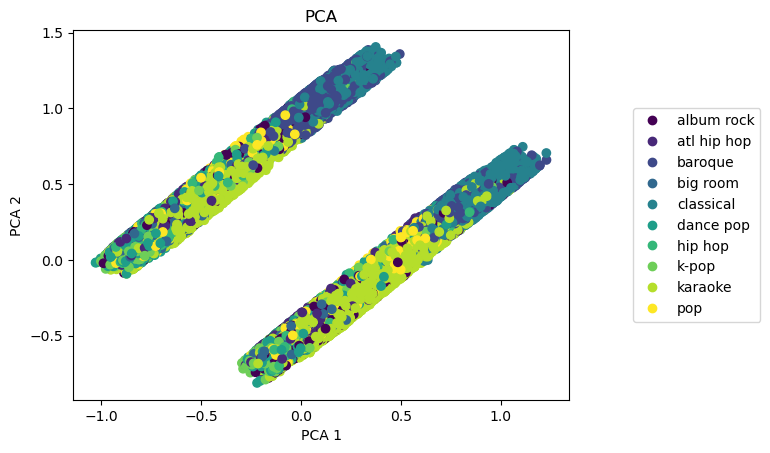

In [355]:
pca = PCA(n_components=0.95)

# Assuming y_encoded is the encoded version of y
x_pca = pca.fit_transform(x)

# Use y_encoded for coloring
plot_pca = plt.scatter(x_pca[:,0], x_pca[:,1], c=y)

# Get unique labels in the order used by LabelEncoder
labels = le.classes_

handles, _ = plot_pca.legend_elements()

# Use labels for the legend
lg = plt.legend(handles, labels, loc='center right', bbox_to_anchor=(1.4, 0.5))

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
_ = plt.title("PCA")

In [356]:
pca.n_components_

8

In [360]:
pca.explained_variance_ratio_

array([0.29073535, 0.25111638, 0.14929188, 0.11910558, 0.06343423,
       0.04444717, 0.02657184, 0.0202861 ])

In [ ]:
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(x, y)
plot_tsne = plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y)
handles, labels = plot_tsne.legend_elements()
lg = plt.legend(handles, list(np.unique(y_org)), loc = 'center right', bbox_to_anchor=(1.4, 0.5))
plt.xlabel("T-SNE 1")
plt.ylabel("T-SNE 2")
_ = plt.title("T-SNE")

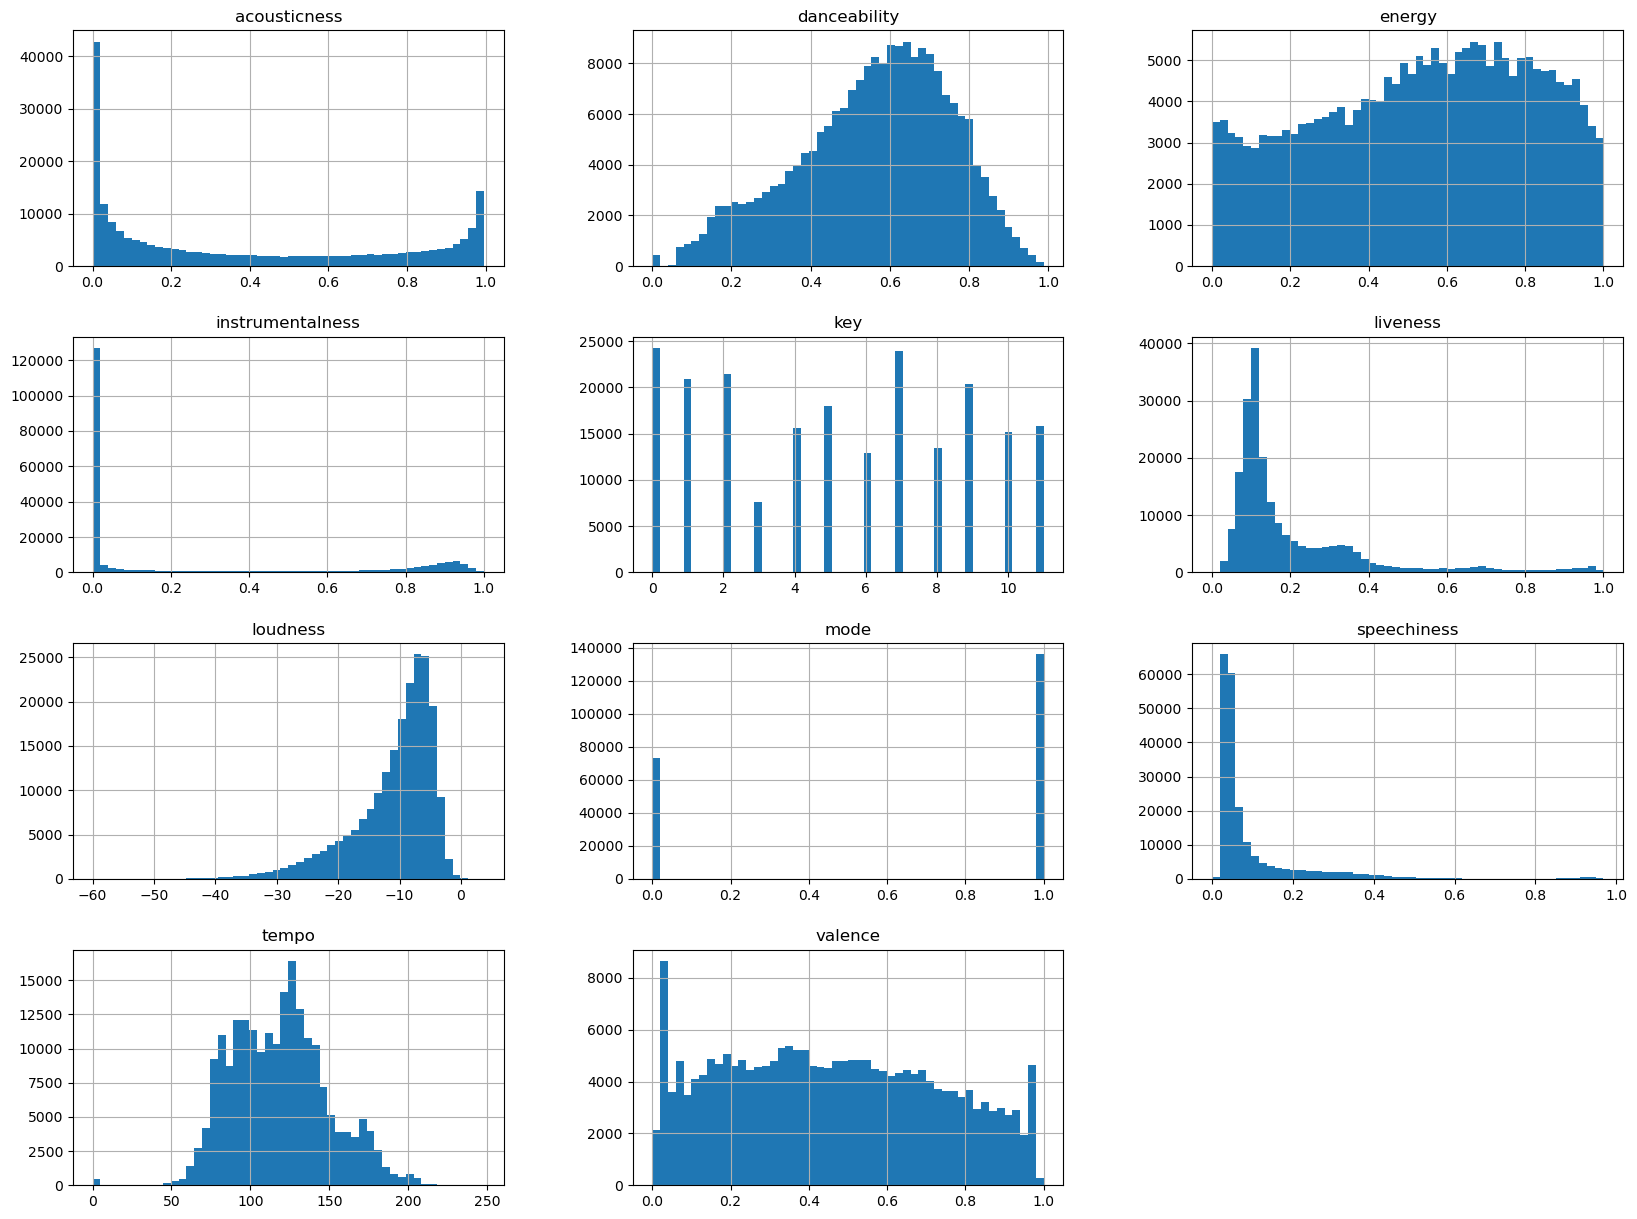

In [357]:
df_new.hist(bins = 50, figsize = (20,15))

plt.show()
